Dataset 1:
YFINANCE TOOL
DATASET 2:
https://www.kaggle.com/datasets/nadun94/twitter-sentiments-aapl-stock/data

In [ ]:
pip install Boruta

In [ ]:
pip install yfinance

In [ ]:
pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from ta import add_all_ta_features
from boruta import BorutaPy
data = yf.download('AAPL', start='2016-01-01', end='2019-09-02')

data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")

features = ['Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
            'volume_mfi', 'momentum_rsi', 'momentum_tsi', 'momentum_uo',
            'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
            'momentum_ao', 'momentum_kama', 'momentum_roc', 'momentum_ppo',
            'momentum_ppo_signal', 'momentum_ppo_hist', 'others_dr',
            'others_dlr', 'others_cr']





[*********************100%%**********************]  1 of 1 completed
c:\Users\ASUS\anaconda3\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [2]:
print(features)

['Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'momentum_rsi', 'momentum_tsi', 'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_kama', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal', 'momentum_ppo_hist', 'others_dr', 'others_dlr', 'others_cr']


In [3]:
data = data[features]

data.dropna(inplace=True)

forecast_col = 'Close'

forecast_out = 30
data['label'] = data[forecast_col].shift(-forecast_out)

X = np.array(data.drop(['label'], axis=1))



C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\2426015979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\2426015979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data[forecast_col].shift(-forecast_out)


In [4]:
df2= pd.read_csv('AAPL.csv', index_col='date',infer_datetime_format=True, parse_dates=True)
print(df2)

            ts_polarity  twitter_volume
date                                   
2016-01-01     0.119693             417
2016-01-02     0.140774             495
2016-01-03     0.181132             518
2016-01-04     0.070389            1133
2016-01-05     0.133635            1430
...                 ...             ...
2019-08-29     0.056460            1083
2019-08-30     0.106096            1005
2019-08-31     0.151625             224
2019-09-01     0.059887             200
2019-09-02     0.086850              74

[1341 rows x 2 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\4135807272.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2= pd.read_csv('AAPL.csv', index_col='date',infer_datetime_format=True, parse_dates=True)


In [5]:
merged_data=data.join(df2,how='inner')

In [6]:
data=merged_data



In [7]:
data.dropna(inplace=True)

In [8]:
print(data)

                Close    volume_adi  volume_obv  volume_cmf     volume_fi  \
2016-02-26  24.227501  9.903973e+07   143290800    0.178137  2.737890e+06   
2016-02-29  24.172501 -3.469290e+07     2425600    0.063878  1.239959e+06   
2016-03-01  25.132500  1.380457e+08   204054000    0.087209  2.871469e+07   
2016-03-02  25.187500  2.410043e+08   336732400    0.154565  2.565507e+07   
2016-03-03  25.375000  3.395531e+08   484555200    0.150087  2.594960e+07   
...               ...           ...         ...         ...           ...   
2019-07-15  51.302502  5.366068e+09  3934089200   -0.098886  9.321719e+06   
2019-07-16  51.125000  5.350300e+09  3866622000   -0.115023  6.279253e+06   
2019-07-17  50.837502  5.298831e+09  3810192000   -0.165275  3.064568e+06   
2019-07-18  51.415001  5.358025e+09  3884354400   -0.103787  8.745164e+06   
2019-07-19  50.647499  5.283609e+09  3800637200   -0.152969 -1.683160e+06   

            volume_mfi  momentum_rsi  momentum_tsi  momentum_uo  \
2016-02-

In [9]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

data.dropna(inplace=True)
y = np.array(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [ ]:
boruta_selector = BorutaPy(XGBRegressor(n_estimators=400, max_depth=4, eta=0.3, colsample_bytree=0.9, reg_lambda=7), n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(X_train, y_train)

In [11]:
selected_features=['Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'momentum_tsi', 'momentum_uo', 'momentum_stoch_signal', 'momentum_ao', 'momentum_kama', 'momentum_ppo', 'momentum_ppo_signal', 'momentum_ppo_hist', 'others_cr','ts_polarity']

In [12]:
data = data[selected_features]
data.dropna(inplace=True)

forecast_col = 'Close'

forecast_out = 30
data['label'] = data[forecast_col].shift(-forecast_out)

X = np.array(data.drop(['label'],axis= 1))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\2894172543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\2894172543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data[forecast_col].shift(-forecast_out)


In [13]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

data.dropna(inplace=True)
y = np.array(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2500\757304959.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [14]:
model = XGBRegressor(n_estimators=400, max_depth=4, eta=0.3, colsample_bytree=0.9, reg_lambda=7)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pip install sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model=XGBRegressor()
parameters={'n_estimators':[100,200,300,400,500],'learning_rate':[0.01,0.05,0.1,0.2,0.3],'max_depth':[2,3,4,5,6],'colsample_bytree':[0.3,0.4,0.5,0.7],'gamma':[0.0,0.1,0.2,0.3,0.4]}
grid_search=GridSearchCV(estimator=model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5,verbose=5)
grid_search.fit(X_train,y_train)


In [15]:
best_parameters = grid_search.best_params_
print("Best parameters for XGBRegressor: ", best_parameters)

Best parameters for XGBRegressor:  {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}


In [15]:
model =XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate=0.05, max_depth= 6, n_estimators= 500)

In [16]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
predictions = model.predict(X_test)

In [18]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.748 (0.105)


In [19]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
print("Mean Absolute Percentage Error(MAPE): ",mean_absolute_percentage_error(y_test,predictions))

Mean Absolute Percentage Error(MAPE):  1.8696634555473088


Root Mean Squared Error: 1.225526666933964
Mean Absolute Error: 0.7875613010290897


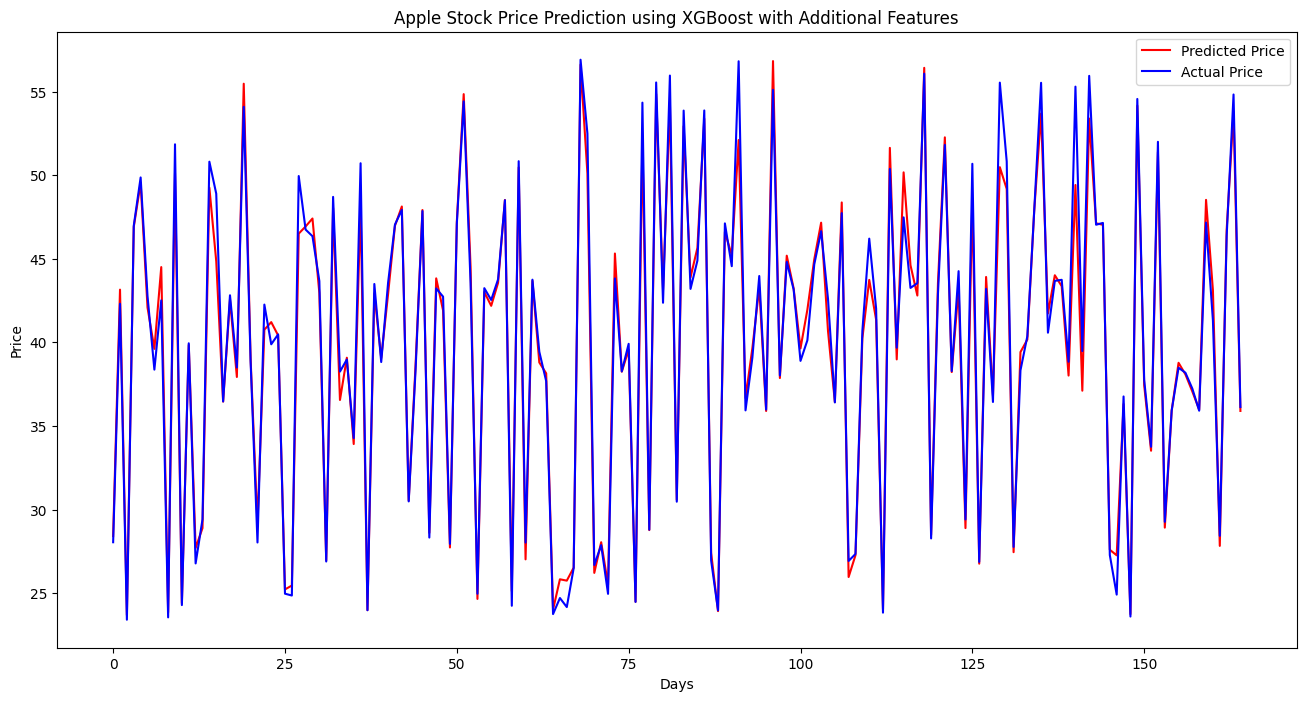

Forecasted Prices: [49.525204 48.950478 49.236496 48.892708 47.833813 48.42418  47.936012
 47.40308  47.701183 47.766384 48.01254  48.179413 49.996876 47.828865
 50.31187  50.292816 50.461124 49.727505 50.248608 50.980186 51.188023
 49.065773 48.021305 49.417343 49.053455 47.490147 49.107883 50.27199
 47.38526  50.232124]


In [21]:

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(16,8))
plt.plot(predictions, color='red', label='Predicted Price')
plt.plot(y_test, color='blue', label='Actual Price')
plt.title('Apple Stock Price Prediction using XGBoost with Additional Features')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

forecast_prediction = model.predict(X_lately)
print(f'Forecasted Prices: {forecast_prediction}')